# Project: Titanic - Machine Learning from Disaster

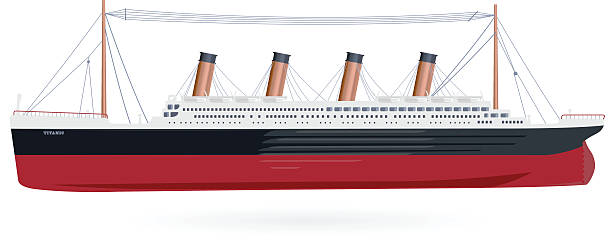

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("train.csv", index_col="PassengerId") # could also use set_index() !!!
test_df = pd.read_csv("test.csv", index_col="PassengerId")

In [4]:
train_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
test_df.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

## Notes:
- `SibSp` : of siblings / spouses aboard the Titanic
- `Parch` : of parents / children aboard the Titanic
- `Ticket` : Ticket number	
- `Cabin` : Cabin number

In [6]:
# Preview the data
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1.1. Feature Classification: Categorical vs Numerical
* This helps us select the appropriate plots for visualization.

### Which features are categorical?

* Categorical Features: `nominal`, `ordinal`, `ratio`, `interval`
* To classify the samples into sets of similar samples

### Which features are numerical?

* Numerical features: `discrete`, `continuous`, or `timeseries`
* These values change from sample to sample

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


* Categorical: `Survived`, `Sex`, `Embarked`, `Pclass` (ordinal), `SibSp`, `Parch`
* Numerical: `Age` (continuous), `Fare` (discrete)
* Mix type of data: `Cabin`, `Ticket`
* Contain Error/ Typo (loi / loi ky tu): `Name`
* Blank or NULL: `Cabin`, `Age`, `Embarked`
* Various data type: int, str, float


According to data dictionary, clearly the number 1 or 0 is a flag for the person's survivalship. Yet the data type of the column is int64, which is a numerical type -> We can change it using the command:

In [9]:
train_df["Survived"] = train_df["Survived"].astype("category")
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    object  
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 77.6+ KB


In [10]:
features = ["Sex", "Embarked", "Pclass", "SibSp", "Parch"]
def convert(df, features):
    for feature in features:
        df[feature] = df[feature].astype("category")
convert(train_df, features)
convert(test_df, features)

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    418 non-null    category
 1   Name      418 non-null    object  
 2   Sex       418 non-null    category
 3   Age       332 non-null    float64 
 4   SibSp     418 non-null    category
 5   Parch     418 non-null    category
 6   Ticket    418 non-null    object  
 7   Fare      417 non-null    float64 
 8   Cabin     91 non-null     object  
 9   Embarked  418 non-null    category
dtypes: category(5), float64(2), object(3)
memory usage: 22.7+ KB


### Distribution of numerical values across the samples

In [13]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


### Distribution of Categorical values across the samples

In [14]:
train_df.describe(include="category")

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


# 2. Exploratory Data Analysis (EDA)

## 2.1. Correlating categorical features:
* Categorical: `Survived`, `Sex`, `Embarked`, `Pclass` (ordinal), `SibSp`, `Parch`

## Target Variable: `Survived`

In [16]:
train_df["Survived"].value_counts().to_frame()

,Survived
0,549
1,342


In [17]:
# if U want percentage -> specify normalization = True
train_df["Survived"].value_counts(normalize=True).to_frame()

,Survived
0,0.616162
1,0.383838


Only 38% survived the disaster. So the training data suffers from data imbalancing but it is not severe so that's why I will not consider techniques like sampling to tackle the imbalance.

## `Sex`

In [19]:
train_df['Sex'].value_counts().to_frame()

,Sex
male,577
female,314


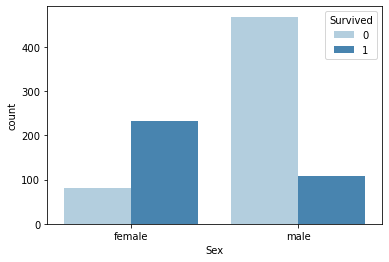

In [24]:
sns.countplot(data = train_df, x = 'Sex', hue = 'Survived', palette = 'Blues'); # Female survive rate is higher 

* Remain categorical Feature columns: 

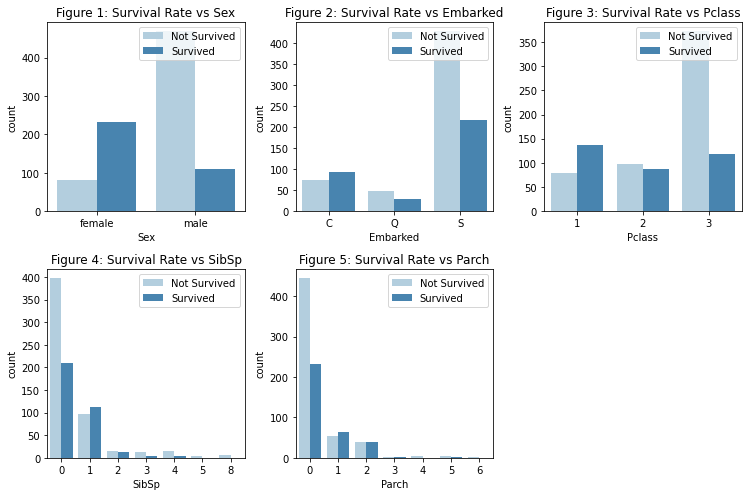

In [31]:
cols = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']
n_rows = 2
n_cols = 3
fig, ax = plt.subplots(n_rows, n_cols, figsize = (n_cols*3.5, n_rows*3.5))
for r in range(n_rows):
    for c in range(n_cols):
        i = r * n_cols + c
        if i < len(cols):
            ax_i = ax[r, c]
            ax_i = sns.countplot(data = train_df, x = cols[i], hue = 'Survived', palette = 'Blues', ax = ax_i)
            ax_i.set_title(f"Figure {i + 1}: Survival Rate vs {cols[i]}")
            ax_i.legend(title = "", loc = "upper right", labels = ["Not Survived", "Survived"])
ax.flat[-1].set_visible(False) # Remove empty subplot
plt.tight_layout()

### Observation

* **Survival Rate**:
    - Fig 1: Female survival rate is higher
    - Fig 2: Most people embarked on Southampton, and also has the highest people not survived
    - Fig 3: 1st class people high survival rate
    - Fig 4: People going with 0 `SibSp` are mostly not survived, 1-2 have the better survival rate
    - Fig 5: Same as fig 4

## 2.2. Correlating numerical features
* Numerical features: `Age`, `Fare` (continuous)

### Age

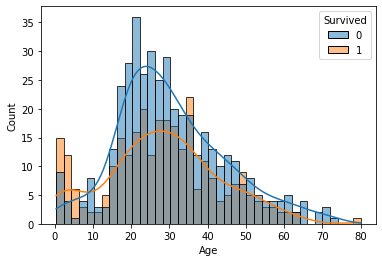

In [34]:
sns.histplot(data = train_df, x = 'Age', bins = 40, hue = 'Survived', kde = True);

* Major passenger range: 18 - 40 years
* Children have better chance of survive than adults

### Fare

In [38]:
train_df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

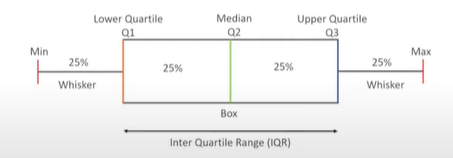

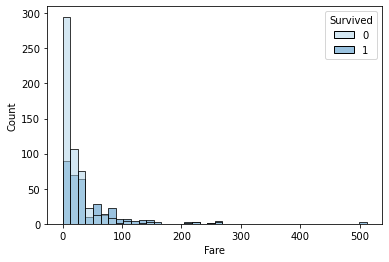

In [41]:
sns.histplot(data = train_df, x = "Fare", bins = 40, hue = "Survived", palette = "Blues");

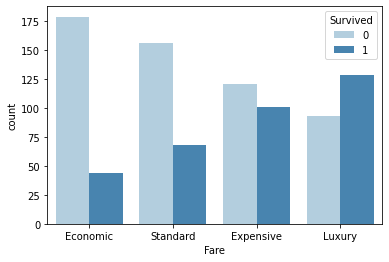

In [47]:
# To name for 0-25 % quartile, 25-50, 50-75, 75-100
fare_categories = ['Economic', 'Standard', 'Expensive', 'Luxury']
quartile_data = pd.qcut(train_df["Fare"], 4, labels=fare_categories)
sns.countplot(x = quartile_data, hue = train_df['Survived'], palette = 'Blues');

* Distribution of fare:
    * Fare does not have a normal distribution and has a huge spike at the price range `[0, 100$]`
    * The distribution is skewed to the left with `75%` of the fare paid under `31$` and a max fare of `512$`
* Quartile plot:
    * Passengers with Expensive and Luxury Fair have more chance of survive
    